<h1 style="color: #00205B;"> 0. Importing Libraries and creating Cleaning Functions </h1>

In [4]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management
import datetime # to play with dates

# 🤖 Machine Learning
from scipy.stats import skew # data distribution assymmetry
from sklearn.preprocessing import MinMaxScaler # data normalization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [5]:
def snake_columns(data): # snake_case columns
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    return data.sample(0)

def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def get_house_lifetime(row): # Define the get_house_lifetime function
    today = datetime.datetime.today().year
    if row['yr_renovated'] != 0:
        return today - row['yr_renovated']
    else:
        return today - row['yr_built']
    
def get_house_soldtime(row): # Define the get_house_soldtime function
    today = datetime.datetime.today().year
    return today - row['year']

    


<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [9]:
data = pd.read_excel('regression_data.xls')

In [10]:
datac = data.copy()

In [11]:
snake_columns(datac)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [12]:
datac.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [13]:
open_data(datac)

Data shape is (21597, 21).

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

Data row sample and full columns:


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5278,1112700130,2015-01-23,3,1.75,1440,8560,1.0,0,0,4,7,1440,0,1979,0,98034,47.7296,-122.232,1460,7560,410000
18462,1346300150,2014-10-20,8,4.00,7710,11750,3.5,0,0,5,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325,3300000
6068,3558000170,2014-07-11,4,2.50,1920,4600,2.0,0,0,3,7,1920,0,2002,0,98038,47.3795,-122.023,2200,6600,329950
14222,9527000040,2014-10-02,3,1.75,1830,9758,1.0,0,0,3,8,1300,530,1977,0,98034,47.7107,-122.230,1850,8000,429950
2220,2817100570,2014-06-27,4,2.75,2300,37533,1.0,0,3,5,8,1550,750,1979,0,98070,47.3714,-122.431,2130,10092,453000


In [14]:
explore_data(datac)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
id,0,0
date,0,0
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0


<h1 style="color: #00BFFF;">02 | Data cleaning</h1>

<h2 style="color: #008080;">Dropping unnecessary features</h2>

In [9]:
datac.sample(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17838,6791200120,2015-04-07,3,2.25,1820,13362,1.0,0,0,3,8,1220,600,1977,0,98075,47.5898,-122.052,2050,15000,515000
7035,5379805120,2015-04-24,2,1.00,740,7380,1.0,0,0,4,6,740,0,1951,0,98188,47.4481,-122.278,1500,10075,213000
13326,8588000610,2014-11-10,3,1.00,1040,8125,1.0,0,0,3,7,1040,0,1956,0,98003,47.3171,-122.316,1200,9375,210000
8188,2526069095,2014-06-05,4,4.25,5660,193593,2.0,0,0,3,10,4100,1560,2001,0,98019,47.7064,-121.981,3620,207141,955000
1213,2095800400,2014-11-13,3,2.50,2090,8653,2.0,0,0,3,8,2090,0,1989,0,98011,47.7498,-122.184,2090,6396,455000


In [10]:
##datac = datac.drop('date', axis=1) # safe date but separately in YEAR, MONTH, DAY
datac = datac.drop('id', axis=1)

In [11]:
datac2 = datac.copy()

<h2 style="color: #008080;">Encoding Categoricals</h2>

In [12]:
#instead of giving them a number, we make them categoricals, and then we will encode them
datac2['year'] = datac2['date'].dt.year
datac2['month'] = datac2['date'].dt.month_name().str.slice(stop=3)
datac2 = datac2.drop(columns=['date'], axis=1)

In [13]:
datac2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,Oct
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,Dec
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,Feb
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,Dec
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,Feb


### What can we do with zipcodes?

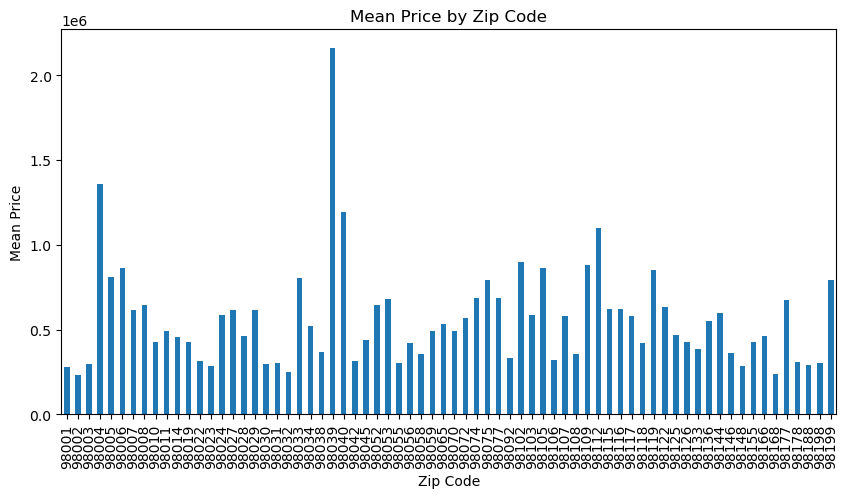

In [14]:


# Group the data by zip code and calculate the mean price for each group
mean_price_by_zip = datac2.groupby('zipcode')['price'].mean()

# Plot the mean price by zip code
mean_price_by_zip.plot(kind='bar', figsize=(10, 5))
plt.title('Mean Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.show()


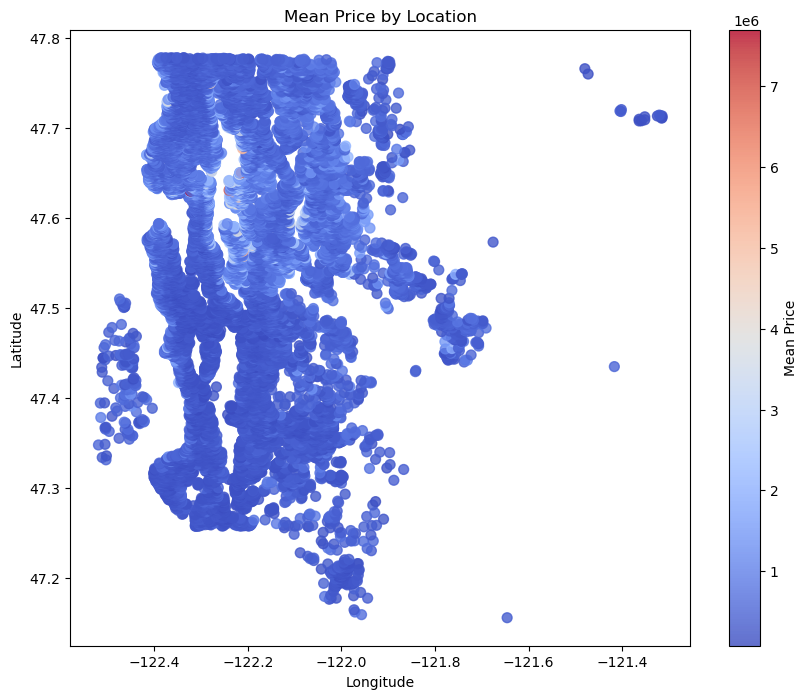

In [15]:

# Group the data by latitude and longitude and calculate the mean price for each group
mean_price_by_location = datac2.groupby(['lat', 'long'])['price'].mean().reset_index()

# Set up the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(mean_price_by_location['long'], mean_price_by_location['lat'], s=50, c=mean_price_by_location['price'], cmap='coolwarm', alpha=0.8)

# Add a color bar
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('Mean Price')

# Set the axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Price by Location')

# Show the plot
plt.show()



In [16]:
datac2 = pd.get_dummies(datac2, columns=['zipcode','month'])


In [17]:
datac2['house_soldtime'] = datac2.apply(get_house_soldtime, axis=1)

In [18]:
datac2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,year,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,house_soldtime
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8.0


<h2 style="color: #008080;">Feature Engineering</h2>

In [19]:
# Apply the function to create a new column 'house_lifetime'
datac2['house_lifetime'] = datac2.apply(get_house_lifetime, axis=1)
datac2 = datac2.drop('yr_built', axis=1)
datac2 = datac2.drop('yr_renovated', axis=1)
datac2 = datac2.drop('year', axis=1)
datac2 = datac2.drop('lat', axis=1)
datac2 = datac2.drop('long', axis=1)
# Print the updated DataFrame
datac2.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,house_soldtime,house_lifetime
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,221900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9.0,68.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,538000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9.0,32.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8.0,90.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,604000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9.0,58.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8.0,36.0
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,4760,101930,1230000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.0,22.0
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,2238,6819,257500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9.0,28.0
7,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1650,9711,291850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,8.0,60.0
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1780,8113,229500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8.0,63.0
9,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2390,7570,323000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8.0,20.0


<AxesSubplot:>

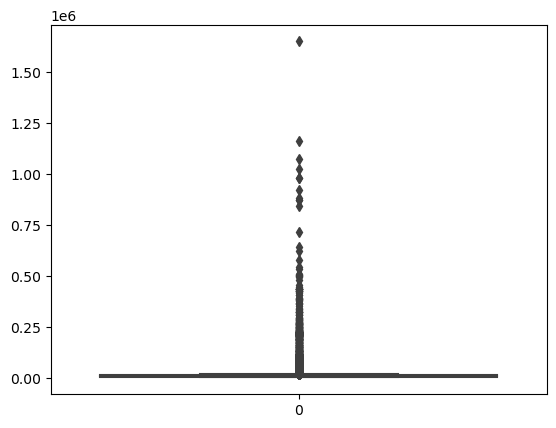

In [20]:
import seaborn as sns

# Assuming you have a dataframe named `df` with columns `col1`, `col2`, and `col3`
sns.boxplot(data=datac2['sqft_lot'])



## Looking for outliers

In [21]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    df_outliers_removed = df.copy()
    for column in columns:
        q1, q3 = np.percentile(df[column], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df_outliers_removed = df_outliers_removed[(df_outliers_removed[column] >= lower_bound) & (df_outliers_removed[column] <= upper_bound)]
    return df_outliers_removed


# Apply the remove_outliers_iqr function to the 'column1' and 'column2' columns with a threshold of 1.5
datac3 = remove_outliers_iqr(datac2, ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15','house_soldtime','house_lifetime'], threshold=3.3)

# Print the results
print('Original data:\n', datac2.shape)
print('Data without outliers:\n', datac3.shape)


Original data:
 (21597, 98)
Data without outliers:
 (17800, 98)


In [22]:
datac3.isna().sum()

bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
                 ..
month_Nov         0
month_Oct         0
month_Sep         0
house_soldtime    0
house_lifetime    0
Length: 98, dtype: int64

In [23]:
# Split the data into input and target variables
X = datac3.drop("price", axis=1)
y = datac3["price"]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [25]:
X_scaled.sample(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,house_soldtime,house_lifetime
8736,0.777178,-0.753758,0.371009,0.682443,-0.895126,0.0,0.0,0.920631,0.489460,-0.041382,0.807454,-0.048747,1.445467,-0.135087,-0.105244,-0.117154,-0.121513,-0.083416,-0.141830,-0.086436,-0.113655,-0.056178,-0.102481,-0.059598,-0.092806,-0.08742,-0.1636,-0.038976,-0.11911,-0.11911,-0.129144,-0.117401,-0.121513,-0.082039,-0.142242,-0.168777,-0.16948,-0.042438,-0.102481,-0.162329,-0.089037,-0.173472,-0.117891,-0.117646,-0.144689,-0.150842,-0.15621,-0.119594,-0.029041,-0.093419,-0.147298,-0.118624,-0.055673,-0.121036,-0.073251,-0.181058,-0.104423,-0.135302,-0.117401,-0.100218,-0.069677,-0.118136,-0.175013,-0.11911,-0.171746,-0.160865,-0.089037,-0.122462,-0.144891,-0.128693,-0.167717,-0.102201,-0.127105,-0.118136,-0.056679,-0.152779,10.035651,-0.120557,-0.098779,-0.107673,-0.084434,-0.108471,-0.115916,-0.340364,-0.314809,-0.271857,4.016448,-0.217356,-0.338717,-0.333541,-0.310369,-0.350653,-0.265730,-0.307533,-0.296793,-1.442077,0.676905
3465,-0.370376,-1.455312,-1.139044,0.074126,-0.895126,0.0,0.0,0.920631,-0.481063,-0.859103,-0.639945,-1.344149,0.022600,-0.135087,-0.105244,-0.117154,-0.121513,-0.083416,-0.141830,-0.086436,-0.113655,-0.056178,-0.102481,-0.059598,-0.092806,-0.08742,-0.1636,-0.038976,-0.11911,-0.11911,-0.129144,-0.117401,-0.121513,-0.082039,-0.142242,-0.168777,-0.16948,-0.042438,-0.102481,-0.162329,-0.089037,-0.173472,-0.117891,-0.117646,-0.144689,-0.150842,-0.15621,-0.119594,-0.029041,-0.093419,-0.147298,-0.118624,-0.055673,-0.121036,-0.073251,-0.181058,-0.104423,7.390873,-0.117401,-0.100218,-0.069677,-0.118136,-0.175013,-0.11911,-0.171746,-0.160865,-0.089037,-0.122462,-0.144891,-0.128693,-0.167717,-0.102201,-0.127105,-0.118136,-0.056679,-0.152779,-0.099645,-0.120557,-0.098779,-0.107673,-0.084434,-0.108471,-0.115916,-0.340364,-0.314809,-0.271857,-0.248976,-0.217356,2.952314,-0.333541,-0.310369,-0.350653,-0.265730,-0.307533,-0.296793,0.693444,0.167739
9291,0.777178,-0.402980,0.082129,0.305461,-0.895126,0.0,0.0,0.920631,0.489460,0.429846,-0.639945,1.246654,0.421220,-0.135087,-0.105244,-0.117154,-0.121513,-0.083416,7.050692,-0.086436,-0.113655,-0.056178,-0.102481,-0.059598,-0.092806,-0.08742,-0.1636,-0.038976,-0.11911,-0.11911,-0.129144,-0.117401,-0.121513,-0.082039,-0.142242,-0.168777,-0.16948,-0.042438,-0.102481,-0.162329,-0.089037,-0.173472,-0.117891,-0.117646,-0.144689,-0.150842,-0.15621,-0.119594,-0.029041,-0.093419,-0.147298,-0.118624,-0.055673,-0.121036,-0.073251,-0.181058,-0.104423,-0.135302,-0.117401,-0.100218,-0.069677,-0.118136,-0.175013,-0.11911,-0.171746,-0.160865,-0.089037,-0.122462,-0.144891,-0.128693,-0.167717,-0.102201,-0.127105,-0.118136,-0.056679,-0.152779,-0.099645,-0.120557,-0.098779,-0.107673,-0.084434,-0.108471,-0.115916,-0.340364,-0.314809,-0.271857,4.016448,-

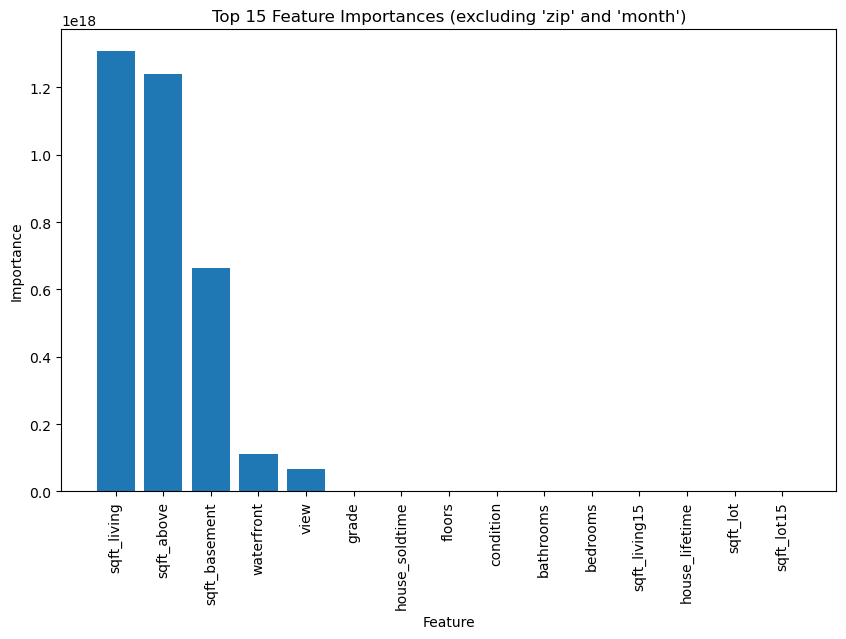

In [26]:
# Select the columns you want to use

# Fit a linear regression model to the data
model = LinearRegression()

model.fit(X_scaled, y)


# Get the feature importances for all columns
importances = np.abs(model.coef_)

# Create a boolean mask to select columns that do not start with 'zip' or 'month'
exclude_mask = ~X.columns.str.startswith(('zip', 'month'))

# Apply the mask to get the names and importances of the selected columns
selected_names = X.columns[exclude_mask]
selected_importances = importances[exclude_mask]

# Sort the selected features by importance
indices = np.argsort(selected_importances)[::-1]

# Limit to the top 15 features
top_indices = indices[:15]
top_importances = selected_importances[top_indices]
top_feature_names = selected_names[top_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15), top_importances)
plt.xticks(range(15), top_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 15 Feature Importances (excluding 'zip' and 'month')")
plt.show()


<h1 style="color: #00BFFF;">03 | EDA</h1>

<h2 style="color: #008080;">Dealing with Duplicates</h2>

## Standard Scaler Results

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) 

In [28]:

# make predictions using your model
y_pred = model.predict(X_test)

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Absolute Error: 69084.85159753625
Mean Squared Error: 10409987859.521448
R^2 Score: 0.8362220888907572


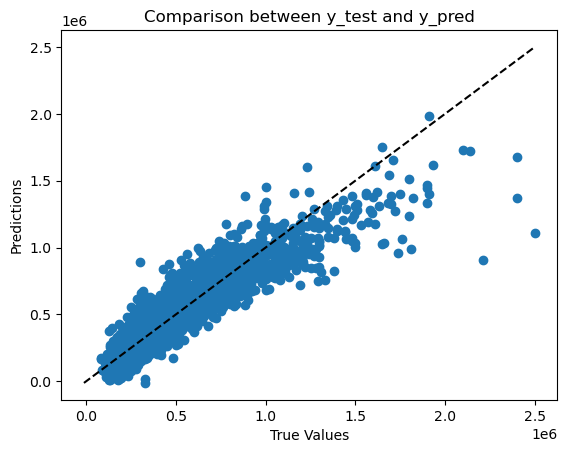

In [29]:
# plot the data
plt.scatter(y_test, y_pred)

# add labels and title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Comparison between y_test and y_pred')

# add a line representing perfect prediction
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

# show the plot
plt.show()

## How can we improve this??

Testinf KNN

In [30]:
scores = []
scores2 = []# We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(10,40): 
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model2 = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_model.fit(X_train, y_train)
    knn_model2.fit(X_train, y_train)
    scores.append(knn_model.score(X_test, y_test))
    scores2.append(knn_model2.score(X_test, y_test))

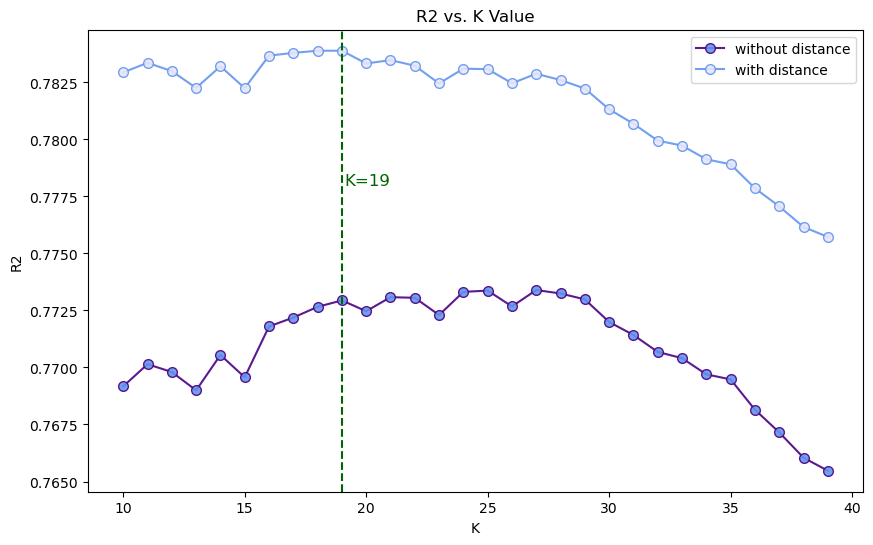

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(10,40), scores, color = 'indigo', linestyle='-',
         marker='o', markerfacecolor='cornflowerblue', markersize=7, label='without distance', alpha=0.9)
plt.plot(range(10,40), scores2, color = 'cornflowerblue', linestyle='-',
         marker='o', markerfacecolor='lavender', markersize=7, label='with distance', alpha=0.9)
#Add vertical line in k=17
plt.axvline(x=19, color='darkgreen', linestyle='dashed')
# Add text to the vertical line
plt.text(19.1, 0.778, "K=19", color='darkgreen', fontsize=12)

plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')
plt.legend()
plt.show()

k=19 is the best argument for KNN

In [32]:
def testing(models_list):
    for i in models_list:
        model = i
        model.fit(X_train,y_train)
        predictions=model.predict(X_test)
        MAE = mean_absolute_error(y_test,predictions)
        MSE = mean_squared_error(y_test,predictions)
        RMSE = np.sqrt(MSE)
        R2 = r2_score(y_test,predictions)
        R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        print("-------------------------")
        print('\033[1m' + "Using the model: " + str(model) + '\033[0m')
        print("The mean absolute error is: %6.3f" % (MAE))
        print("The mean squared error is: %6.3f" % (MSE))
        print("The root mean squared error is: %6.3f" % (RMSE))
        print("The R2 is: %6.3f" % (R2))
        print("The Adjusted R2 is: %6.3f" % (R2_adj))

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models=[
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=19, weights = "distance"),
    ElasticNet(alpha=0.01, l1_ratio=0.5),
    MLPRegressor(hidden_layer_sizes=(10, 5, 5), activation='relu', solver='adam', max_iter=2000),
    ##MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000),
    ##DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [34]:
testing(models)

-------------------------
Using the model: LinearRegression()
The mean absolute error is: 69976.152
The mean squared error is: 10564674687.938
The root mean squared error is: 102784.603
The R2 is:  0.834
The Adjusted R2 is:  0.831
-------------------------
Using the model: KNeighborsRegressor(n_neighbors=19, weights='distance')
The mean absolute error is: 76985.079
The mean squared error is: 13736361481.771
The root mean squared error is: 117202.225
The R2 is:  0.784
The Adjusted R2 is:  0.780
-------------------------
Using the model: ElasticNet(alpha=0.01)
The mean absolute error is: 69828.774
The mean squared error is: 10553183519.711
The root mean squared error is: 102728.689
The R2 is:  0.834
The Adjusted R2 is:  0.831
-------------------------
Using the model: MLPRegressor(hidden_layer_sizes=(10, 5, 5), max_iter=2000)
The mean absolute error is: 56901.708
The mean squared error is: 7576641129.060
The root mean squared error is: 87043.903
The R2 is:  0.881
The Adjusted R2 is:  0.8

In [35]:
datac3.price.min()

78000

In [36]:
datac3.price.max()

3400000

In [37]:
datac3.price.median()

423250.0

In [38]:
datac3.price.mean()

481519.22179775283

In [39]:
print("The percentage of the error is: ", round(57354.907/(datac3.price.median())*100, 2), "%")

The percentage of the error is:  13.55 %


In [40]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Create an instance of the ElasticNet class
enet = ElasticNet()

# Create a GridSearchCV object to search over the hyperparameter grid
grid_search = GridSearchCV(enet, param_grid=param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.5}


## Lets see how good is the MLPRegressor Model

In [41]:
ModelMLP = MLPRegressor(hidden_layer_sizes=(10, 5, 5), activation='relu', solver='adam', max_iter=2000)
ModelMLP.fit(X_train, y_train)
MLPpredictions=ModelMLP.predict(X_test)

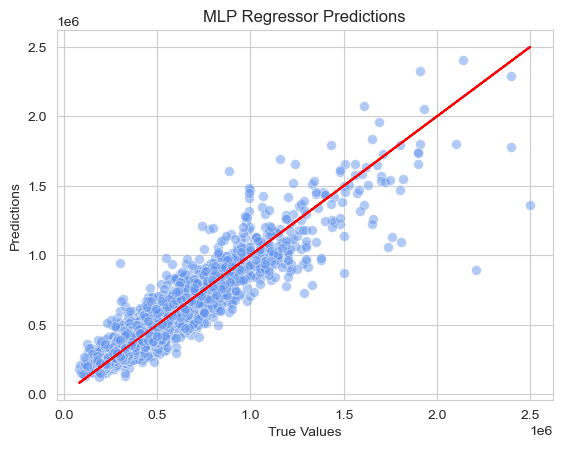

-------------------------
Using the model: MLPRegressor(hidden_layer_sizes=(10, 5, 5), max_iter=2000)
The mean absolute error is: 56550.067
The mean squared error is: 7641673212.365
The root mean squared error is: 87416.664
The R2 is:  0.880
The Adjusted R2 is:  0.878


In [46]:
sns.set_style('whitegrid')
# plot the predictions
sns.scatterplot(x=y_test, y=MLPpredictions, s=50, alpha=0.5, color='cornflowerblue')

# plot the ideal predictions line
plt.plot(y_test, y_test, color='red', linestyle='-')

# set the title and labels
plt.title('MLP Regressor Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

MAE = mean_absolute_error(y_test,MLPpredictions)
MSE = mean_squared_error(y_test,MLPpredictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,MLPpredictions)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("-------------------------")
print('\033[1m' + "Using the model: " + str(ModelMLP) + '\033[0m')
print("The mean absolute error is: %6.3f" % (MAE))
print("The mean squared error is: %6.3f" % (MSE))
print("The root mean squared error is: %6.3f" % (RMSE))
print("The R2 is: %6.3f" % (R2))
print("The Adjusted R2 is: %6.3f" % (R2_adj))

In [53]:
# Create a new column in the test data frame that contains the residuals
datac2['residuals'] = y_test - MLPpredictions
# Create a new column with the rank of the 'price' column
datac2['price_rank'] = datac2['price'].rank(ascending=False)

# Sort the data frame by the absolute value of the residuals
sorted_data = datac2.reindex(datac2['residuals'].abs().sort_values(ascending=False).index)

# Print the first 10 rows of the sorted data frame
sorted_data[['price','residuals','price_rank']].head(30)

,price,residuals,price_rank
19668,2210000,1.313983e+06,163.0
7304,2500000,1.134731e+06,100.0
3717,884900,-7.216092e+05,2179.0
13774,1810000,7.145161e+05,289.0
5428,1740000,6.793090e+05,330.0
14821,300523,-6.414992e+05,17034.0
18861,1500000,6.269852e+05,526.0
9599,1760000,6.252758e+05,316.5
1943,2400000,6.176962e+05,120.0
12413,1290000,5.619011e+05,816.5


In [55]:
datac2.price_rank.max()

21597.0

In [56]:
datac2.price_rank.min()

1.0